<a href="https://colab.research.google.com/github/guitar79/OA-2018/blob/master/08_3_Read_fits_mono_16bit_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read fits file**


* 이 자료는16 bit Fits file

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

#Download data

[Download fits files](https://drive.google.com/open?id=1guTGchioD5iD8tr1HOu0Qjjj_MjL-c-M)

In [3]:
!pip install astropy

from astropy.io import fits
import matplotlib.pyplot as plt

#dir_name = '20181012.M42'
f_name = 'm42-003L.fit'

# Processing data



In [4]:
# read 16bit monochrome fits file
hdu = fits.open(f_name)
print(hdu)
print(dir(hdu))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data', '_file', '_flush_resize', '_flush_update', '_in_read_next_hdu', '_open_kwargs', '_positive_index_of', '_read_all', '_read_next_hdu', '_readfrom', '_resize', '_save_backup', '_truncate', '_try_while_unread_hdus', '_verify', '_wasresized', 'append', 'clear', 'close', 'copy', 'count', 'extend', 'fileinfo', 'filename', 'flush', 'fromfile', 'fromstring', 'index', 'index_of', 'info', 'insert', 'pop', 'readall', 'remove', 'reverse', 'run_option', 'sort', 'update_ext

In [5]:
fits_data = hdu[0].data
print(dir(fits_data))
print(fits_data.shape)
print(fits_data)

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmatmul__', '__

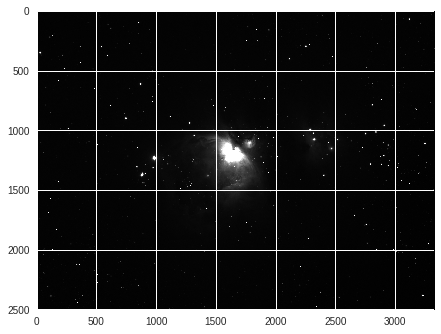

In [6]:
# show fits file 
plt.imshow(fits_data, cmap = 'gray', interpolation = 'None')
plt.show()

정리 차원에서 최종 코드와 HST 자료를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-3.read_fits_mono_16bit_file.py)